In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import *

from pyspark.ml.stat import Correlation

In [2]:
spark = (
    SparkSession.builder
        .master('local')
        .appName('trilha_session')
        .getOrCreate()
)

In [3]:
df = spark.read.csv('vehicle_signals.csv', header=True, inferSchema=True)

2. Correlation Analysis:
- a. Calculate the correlation between Speed, RPM and Fuel_Efficiency.
- b. Identify which factor (Speed or RPM) has a stronger impact on Fuel_Efficiency.

In [5]:
selected_features = ['RPM', 'Speed', 'Fuel_Efficiency']

assembler = VectorAssembler(inputCols=selected_features, outputCol="features")

df_correlation = assembler.transform(df.select(selected_features))

In [ ]:
pearson_corr_matrix = Correlation.corr(df_correlation, "features", method="pearson").head()

pearson_corr_matrix

In [ ]:
corr_values = pearson_corr_matrix[0].toArray()
corr_values

3. Signal-Based Insights:
- a. Categorize vehicles based on their average engine RPM:
  - i. Low RPM (<2000 RPM)
  - ii. Optimal RPM (2000-4000 RPM)
  - iii. High RPM (> 4000 RPM)
- b. Count the number of vehicles in each RPM category.
- c. Identify vehicles with Temperature > 230°F and classify them as Overheated.


In [4]:
# df['Average_Engine'] = 'Low' if df['RPM'] < 2000 else 'Medium' if df['RPM'] >= 2000 & df['RPM'] < 4000 else 'High' 

df = df.withColumn(
    'Average_Engine',
    when(col('RPM') < 2000, 'Low')
    .when((col('RPM') >= 2000) & (col('RPM') < 4000), 'Medium')
    .otherwise('High')
)


In [ ]:
df.groupBy("Average_Engine").count()


In [5]:
df = df.withColumn(
    'Heat_Status',
    when(col('Temperature') > 230, 'Overheated')
    .otherwise('Normal')
)


4. Visualization:
- a. Create a line plot for a sample vehicle showing its RPM, Speed and Fuel_Efficiency over time (simulating time-series analysis).
- b. Plot a scatter plot comparing Speed and Fuel_Efficiency with RPM as the color gradient.


In [6]:
vehicle = df.filter(col('Vehicle_ID') == "VH1008")




In [7]:
from pyspark.sql.functions import monotonically_increasing_id



In [ ]:
# Add a fake time column for plotting
vehicle_with_time = vehicle.withColumn("Time", monotonically_increasing_id())



PySparkTypeError: [NOT_COLUMN] Argument `col` should be a Column, got str.

In [9]:
# Select columns safely
sample_vehicle_pd = vehicle_with_time.select("Time", "RPM", "Speed", "Fuel_Efficiency").limit(100).toPandas()

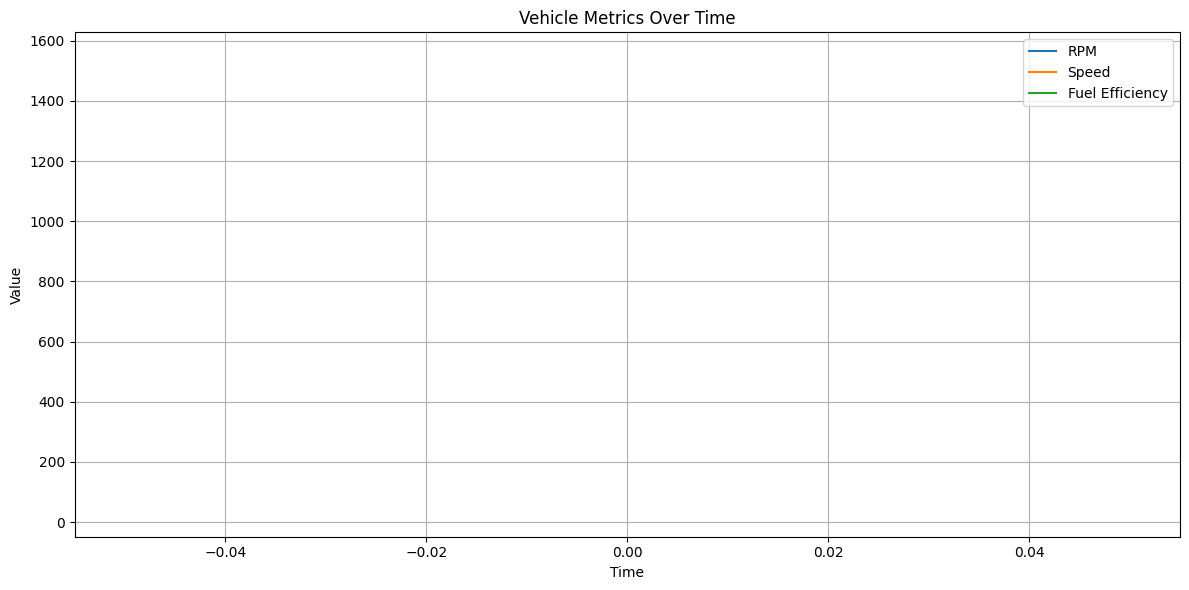

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sample_vehicle_pd["Time"], sample_vehicle_pd["RPM"], label="RPM")
plt.plot(sample_vehicle_pd["Time"], sample_vehicle_pd["Speed"], label="Speed")
plt.plot(sample_vehicle_pd["Time"], sample_vehicle_pd["Fuel_Efficiency"], label="Fuel Efficiency")

plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Vehicle Metrics Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
